In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
from datetime import datetime
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set default visualization parameters

CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber, CB91_Purple, CB91_Violet]
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)
sns.set_context("notebook", rc={"font.size":16, "axes.titlesize":20, "axes.labelsize":18})
sns.set(font='Franklin Gothic Book',
rc={'axes.axisbelow': False,
'axes.edgecolor': 'lightgrey',
# 'axes.edgecolor': 'white',
'axes.facecolor': 'None',
'axes.grid': False,
'axes.labelcolor': 'dimgrey',
# 'axes.labelcolor': 'white',
'axes.spines.right': False,
'axes.spines.top': False,
'axes.prop_cycle': plt.cycler(color=color_list),
'figure.facecolor': 'white',
'lines.solid_capstyle': 'round',
'patch.edgecolor': 'w',
'patch.force_edgecolor': True,
'text.color': 'dimgrey',
# 'text.color': 'white',
'xtick.bottom': False,
'xtick.color': 'dimgrey',
# 'xtick.color': 'white',
'xtick.direction': 'out',
'xtick.top': False,
'ytick.color': 'dimgrey',
# 'ytick.color': 'white',
'ytick.direction': 'out',
'ytick.left': False,
'ytick.right': False})
%matplotlib inline

In [4]:
aisles = pd.read_csv("/content/aisles.csv")
departments = pd.read_csv("/content/departments.csv")
order_products_prior = pd.read_csv("/content/order_products__prior.csv")
order_products_train = pd.read_csv("/content/order_products__train.csv")
orders = pd.read_csv("/content/orders.csv")
products = pd.read_csv("/content/products.csv")

In [5]:
aisles.isna().sum()

aisle_id    0
aisle       0
dtype: int64

In [6]:
departments.isna().sum()

department_id    0
department       0
dtype: int64

In [7]:
products.isna().sum()


product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [8]:
orders.isna().sum()

order_id                   0
user_id                    0
eval_set                   0
order_number               0
order_dow                  0
order_hour_of_day          0
days_since_prior_order    50
dtype: int64

In [10]:
orders.days_since_prior_order.value_counts()

30.0    38
7.0     33
6.0     24
8.0     19
4.0     17
5.0     16
3.0     13
9.0     12
14.0    12
12.0    11
10.0     9
21.0     7
15.0     7
11.0     6
28.0     6
13.0     6
2.0      6
16.0     5
1.0      5
20.0     4
17.0     4
27.0     3
19.0     3
0.0      2
22.0     2
18.0     2
26.0     2
29.0     1
25.0     1
23.0     1
24.0     1
Name: days_since_prior_order, dtype: int64

In [11]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5762999,1,prior,1,2,8,NaN
1,5770554,1,prior,2,3,7,15.0
2,5769687,1,prior,3,3,12,21.0
3,5753289,1,prior,4,4,7,29.0
4,5749777,1,prior,5,4,15,28.0


In [12]:
order_products_train.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [13]:
order_products_prior.isna().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

Analyze 'Products

In [14]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,TOOR DALL,1,1
1,2,GRAM DALL,1,1
2,3,MOONG DALL,1,1
3,4,URAD DALL,1,1
4,5,MASOOR DALL RED,1,1


In [16]:
print(len(products))
print(products.aisle_id.nunique())
print(products.department_id.nunique())

207
23
11


In [17]:
products_aisles = pd.merge(products, aisles, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisles, departments, on = 'department_id', how = 'left')
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,TOOR DALL,1,1,DALL,Grains and Cereals Department
1,2,GRAM DALL,1,1,DALL,Grains and Cereals Department
2,3,MOONG DALL,1,1,DALL,Grains and Cereals Department
3,4,URAD DALL,1,1,DALL,Grains and Cereals Department
4,5,MASOOR DALL RED,1,1,DALL,Grains and Cereals Department


Text(0.5, 0, 'Department')

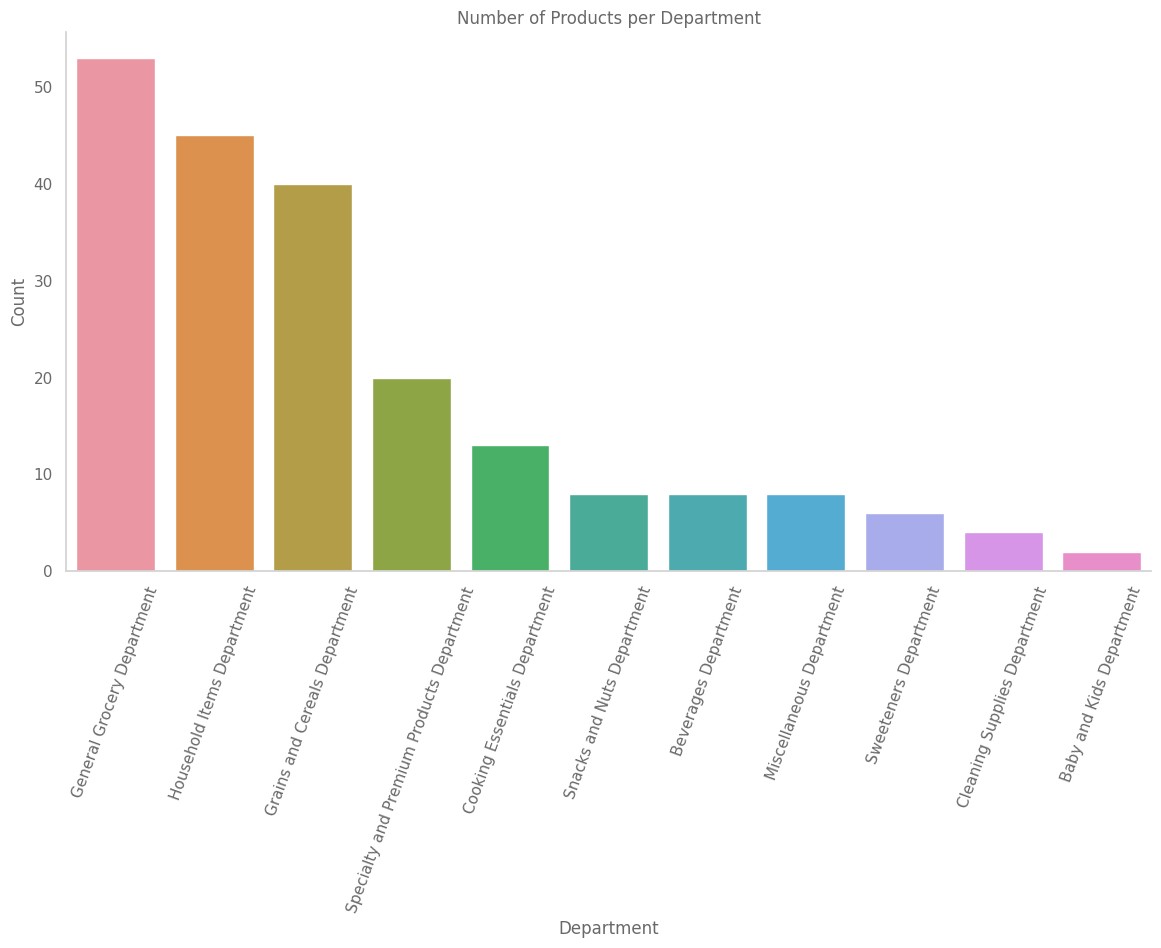

In [19]:
plt.figure(figsize = (14,7))
sns.countplot(x='department', data= products_desc, order = products_desc.department.value_counts().index)
plt.title('Number of Products per Department')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Department')


Text(0.5, 0, 'Aisle')

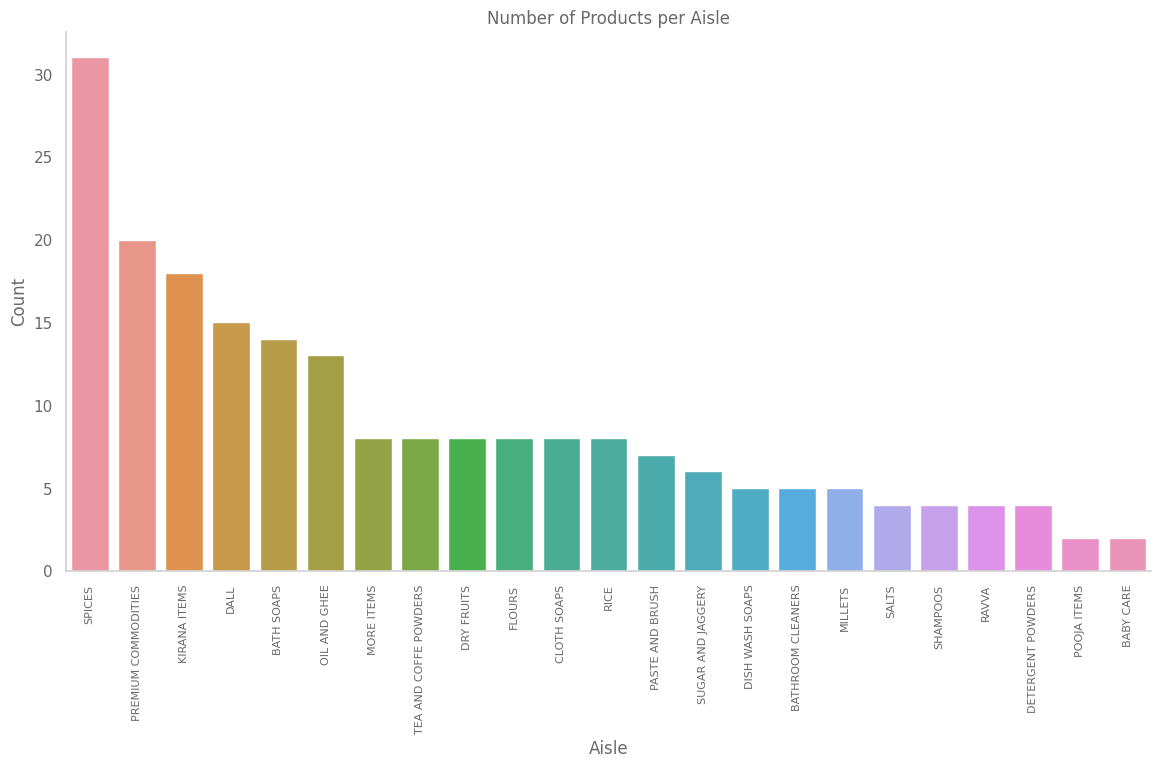

In [20]:
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= products_desc, order = products_desc.aisle.value_counts().index)
plt.title('Number of Products per Aisle')
plt.xticks(rotation=90, fontsize = 8)
plt.ylabel('Count')
plt.xlabel('Aisle')

In [23]:
products_desc[products_desc['aisle']=='MORE ITEMS']

,product_id,product_name,aisle_id,department_id,aisle,department
199,200,SEMIA LOOSE,23,11,MORE ITEMS,Miscellaneous Department
200,201,THIRUVATHA GINJALU,23,11,MORE ITEMS,Miscellaneous Department
201,202,NALLA NUGULU,23,11,MORE ITEMS,Miscellaneous Department
202,203,PASAPU KOMMULU,23,11,MORE ITEMS,Miscellaneous Department
203,204,SANNA AVALU,23,11,MORE ITEMS,Miscellaneous Department
204,205,SABJA GINJALU,23,11,MORE ITEMS,Miscellaneous Department
205,206,SWEET SOPU,23,11,MORE ITEMS,Miscellaneous Department
206,207,BAMBINO SEMIA,23,11,MORE ITEMS,Miscellaneous Department


In [24]:
products_desc[products_desc['department']=='Grains and Cereals Department']

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,TOOR DALL,1,1,DALL,Grains and Cereals Department
1,2,GRAM DALL,1,1,DALL,Grains and Cereals Department
2,3,MOONG DALL,1,1,DALL,Grains and Cereals Department
3,4,URAD DALL,1,1,DALL,Grains and Cereals Department
4,5,MASOOR DALL RED,1,1,DALL,Grains and Cereals Department
5,6,ALASANDA BHAYALU,1,1,DALL,Grains and Cereals Department
6,7,ANUMULU,1,1,DALL,Grains and Cereals Department
7,8,KANDULU,1,1,DALL,Grains and Cereals Department
8,9,WHEAT,1,1,DALL,Grains and Cereals Department
9,10,GREEN BATANI DRIED,1,1,DALL,Grains and Cereals Department


In [25]:
products_desc[products_desc['aisle_id']==15]

,product_id,product_name,aisle_id,department_id,aisle,department
150,151,COLGATE STRONG TEETH,15,7,PASTE AND BRUSH,Household Items Department
151,152,CLOSE-UP PASTE,15,7,PASTE AND BRUSH,Household Items Department
152,153,DABUR RED PASTE,15,7,PASTE AND BRUSH,Household Items Department
153,154,COLGATE ACTIVE SALT PASTE,15,7,PASTE AND BRUSH,Household Items Department
154,155,COLGATE MAX FRESH 81GM,15,7,PASTE AND BRUSH,Household Items Department
155,156,DABUR MESWAK 100GM,15,7,PASTE AND BRUSH,Household Items Department
156,157,PEPSODENT 100GM,15,7,PASTE AND BRUSH,Household Items Department


Analyze Orders

In [27]:
print(len(orders))
print(orders.order_id.min())
print(orders.order_id.max())

328
4671234
5770554


Text(0.5, 0, 'Hour')

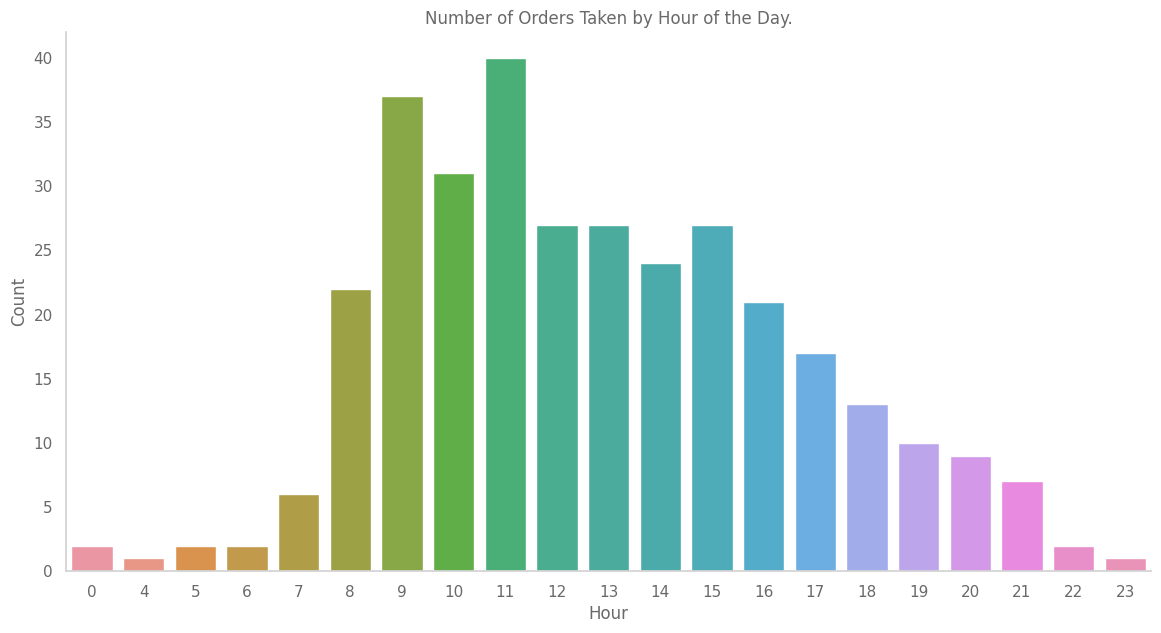

In [28]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_hour_of_day', data= orders)
plt.title('Number of Orders Taken by Hour of the Day.')
plt.ylabel('Count')
plt.xlabel('Hour')

Text(0.5, 0, 'Day')

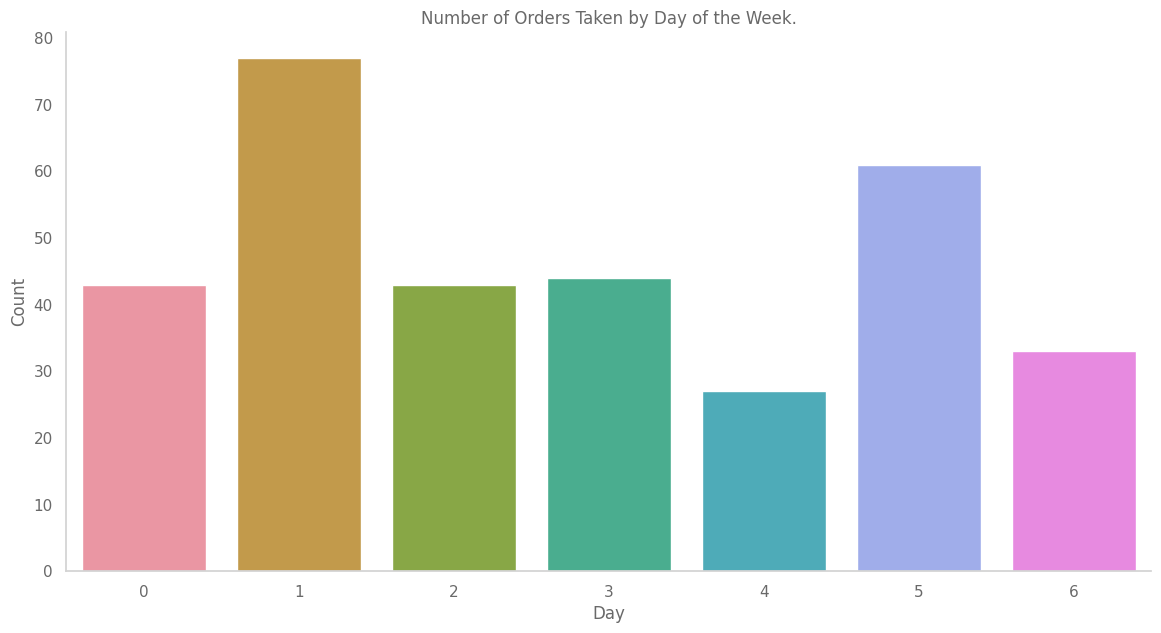

In [29]:
plt.figure(figsize = (14,7))
sns.countplot(x='order_dow', data= orders)
plt.title('Number of Orders Taken by Day of the Week.')
plt.ylabel('Count')
plt.xlabel('Day')

Text(0.5, 0, 'Days')

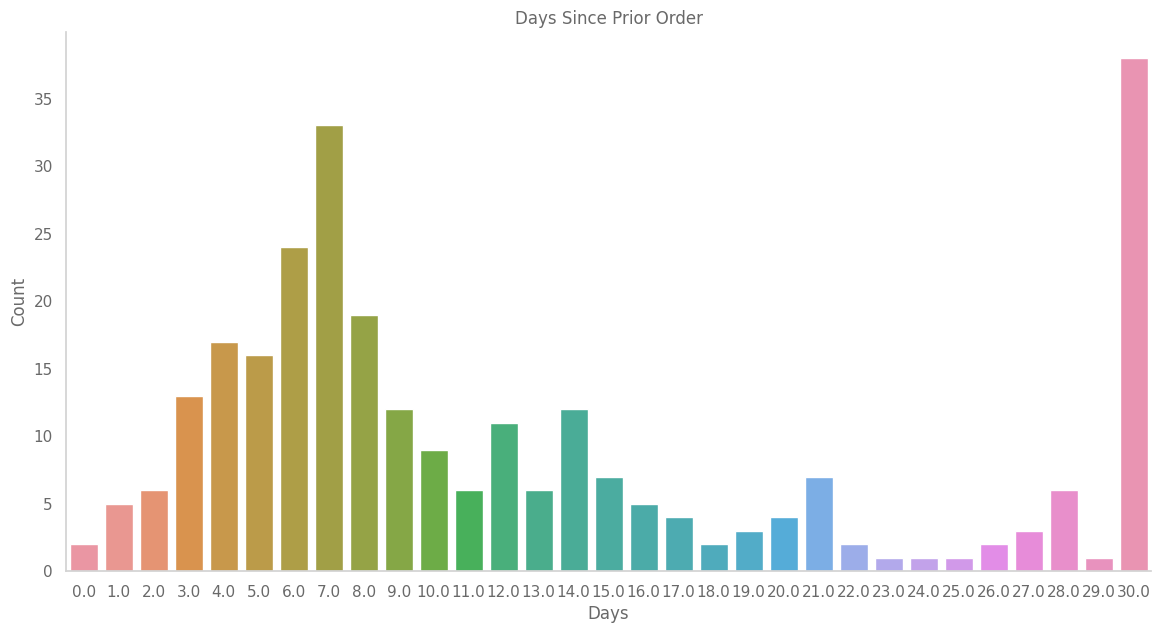

In [30]:
plt.figure(figsize = (14,7))
sns.countplot(x='days_since_prior_order', data= orders)
plt.title('Days Since Prior Order')
plt.ylabel('Count')
plt.xlabel('Days')

In [31]:
orders.head(15)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5762999,1,prior,1,2,8,NaN
1,5770554,1,prior,2,3,7,15.0
2,5769687,1,prior,3,3,12,21.0
3,5753289,1,prior,4,4,7,29.0
4,5749777,1,prior,5,4,15,28.0
5,5749604,1,prior,6,2,7,19.0
6,5748473,1,prior,7,1,9,20.0
7,5743290,1,prior,8,1,14,14.0
8,5717474,1,prior,9,1,16,0.0
9,5698103,1,prior,10,4,8,30.0


In [32]:
orders.sort_values('order_id')

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
327,4671234,50,train,8,2,10,3.0
326,4672375,50,prior,7,3,9,12.0
325,4678123,50,prior,6,1,11,3.0
324,4682967,50,prior,5,5,11,10.0
323,4684376,50,prior,4,4,15,7.0
...,...,...,...,...,...,...,...
4,5749777,1,prior,5,4,15,28.0
3,5753289,1,prior,4,4,7,29.0
0,5762999,1,prior,1,2,8,NaN
2,5769687,1,prior,3,3,12,21.0


In [34]:
orders_test = orders[orders['eval_set']=='test']
orders_test

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
44,5275460,4,test,6,3,12,30.0
49,5214957,5,test,5,0,11,6.0
53,5193648,6,test,4,3,16,22.0
78,4949596,8,test,4,1,14,10.0
82,4888865,9,test,4,6,10,30.0
92,4856210,11,test,4,5,13,30.0
113,4826350,14,test,3,0,14,8.0
119,4821357,16,test,1,6,8,20.0
158,4798712,22,test,5,0,14,26.0
177,4788905,26,test,5,6,12,8.0


In [35]:
orders[orders['user_id']==3]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
26,5442234,3,prior,1,1,14,NaN
27,5427949,3,prior,2,3,19,9.0
28,5404550,3,prior,3,3,16,21.0
29,5379860,3,prior,4,2,18,20.0
30,5376024,3,prior,5,0,17,12.0
31,5366020,3,prior,6,0,16,7.0
32,5366006,3,prior,7,0,15,7.0
33,5352987,3,prior,8,0,17,7.0
34,5350749,3,prior,9,0,16,7.0
35,5335622,3,prior,10,3,16,17.0


In [36]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,78,1,1
1,2,197,1,1
2,3,55,1,0
3,7,59,1,0
4,10,168,1,1


In [37]:
print(len(order_products_train))
print(order_products_train.order_id.min())
print(order_products_train.order_id.max())
print(order_products_train.order_id.nunique())

32
1
50
32


In [38]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,5762999,68,1,1
1,5770554,181,2,1
2,5769687,180,3,0
3,5753289,111,4,1
4,5749777,157,5,0


In [39]:
print(len(order_products_prior))
print(order_products_prior.order_id.min())
print(order_products_prior.order_id.max())
print(order_products_prior.order_id.nunique())

328
4671234
5770554
328


In [42]:
orders[orders.order_id == 5770554]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1,5770554,1,prior,2,3,7,15.0


In [43]:
orders[orders.user_id == 1]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,5762999,1,prior,1,2,8,NaN
1,5770554,1,prior,2,3,7,15.0
2,5769687,1,prior,3,3,12,21.0
3,5753289,1,prior,4,4,7,29.0
4,5749777,1,prior,5,4,15,28.0
5,5749604,1,prior,6,2,7,19.0
6,5748473,1,prior,7,1,9,20.0
7,5743290,1,prior,8,1,14,14.0
8,5717474,1,prior,9,1,16,0.0
9,5698103,1,prior,10,4,8,30.0


In [47]:
len(orders[orders.user_id == 8])

4

In [46]:
orders[orders.user_id == 8].order_dow.mode()

0    1
Name: order_dow, dtype: int64

In [48]:
orders[orders.user_id == 8].days_since_prior_order.mean()

23.333333333333332

In [49]:
orders[orders.user_id == 8].order_hour_of_day.mean()

5.5

In [50]:
# These are their order numbers
list(orders[orders.user_id == 8]['order_id'].values)

[4961586, 4956320, 4952493, 4949596]

In [52]:
# But what products have they ordered... merging tables will help here
order_products_prior[order_products_prior['order_id'].isin(list(orders[orders.user_id == 8]['order_id'].values))]

,order_id,product_id,add_to_cart_order,reordered
75,4961586,75,1,1
76,4956320,156,2,0
77,4952493,202,3,1
78,4949596,145,4,1


Data Preprocessing

Merge order_products together

In [53]:
print(len(order_products_train))
print(len(order_products_prior))


32
328


In [54]:
# The dataframe of all order products should be the length of these two together
len(order_products_train)+len(order_products_prior)

360

In [56]:
# These two dataframes shouldn't have any overlap.  I need an outer join to merge them together.
merged_order_products = pd.merge(order_products_train, order_products_prior, how = 'outer')
merged_order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,78,1,1
1,2,197,1,1
2,3,55,1,0
3,7,59,1,0
4,10,168,1,1


In [57]:
len(merged_order_products)

360

In [58]:
products_per_order = merged_order_products.groupby('order_id').count()

In [61]:
products_per_order

,product_id,add_to_cart_order,reordered
order_id,,,
1,1,1,1
2,1,1,1
3,1,1,1
7,1,1,1
10,1,1,1
...,...,...,...
5749777,1,1,1
5753289,1,1,1
5762999,1,1,1


In [62]:
# This has an entry for each ordered product.  If we combine it with aisle and department we can see which products
# are ordered the most.
order_products_desc = pd.merge(merged_order_products, products_desc, on = 'product_id')
order_products_desc.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,78,1,1,MIRIYALU,7,3,SPICES,General Grocery Department
1,5216418,78,4,1,MIRIYALU,7,3,SPICES,General Grocery Department
2,2,197,1,1,SURF EXEL QUICK WASH DETERGENT POWDER 500GM,22,9,DETERGENT POWDERS,Cleaning Supplies Department
3,3,55,1,0,SONA MASSURI RICE 1KG,5,10,PREMIUM COMMODITIES,Specialty and Premium Products Department
4,37,55,1,1,SONA MASSURI RICE 1KG,5,10,PREMIUM COMMODITIES,Specialty and Premium Products Department


In [63]:
order_products_desc['product_name'].value_counts()

SAGGUBIYYAM              5
KORRA BIYYAM             5
DAIMOND KALAKANDA        5
ALASANDHALU 1KG          5
MTR GARAM MASALA 50GM    4
                        ..
ANSA PUVVU 10GM          1
SANNA AVALU              1
DURGA GHEE               1
VIM LEMON DISH SOAP      1
SABJA GINJALU            1
Name: product_name, Length: 174, dtype: int64

Text(0.5, 0, 'Product Name')

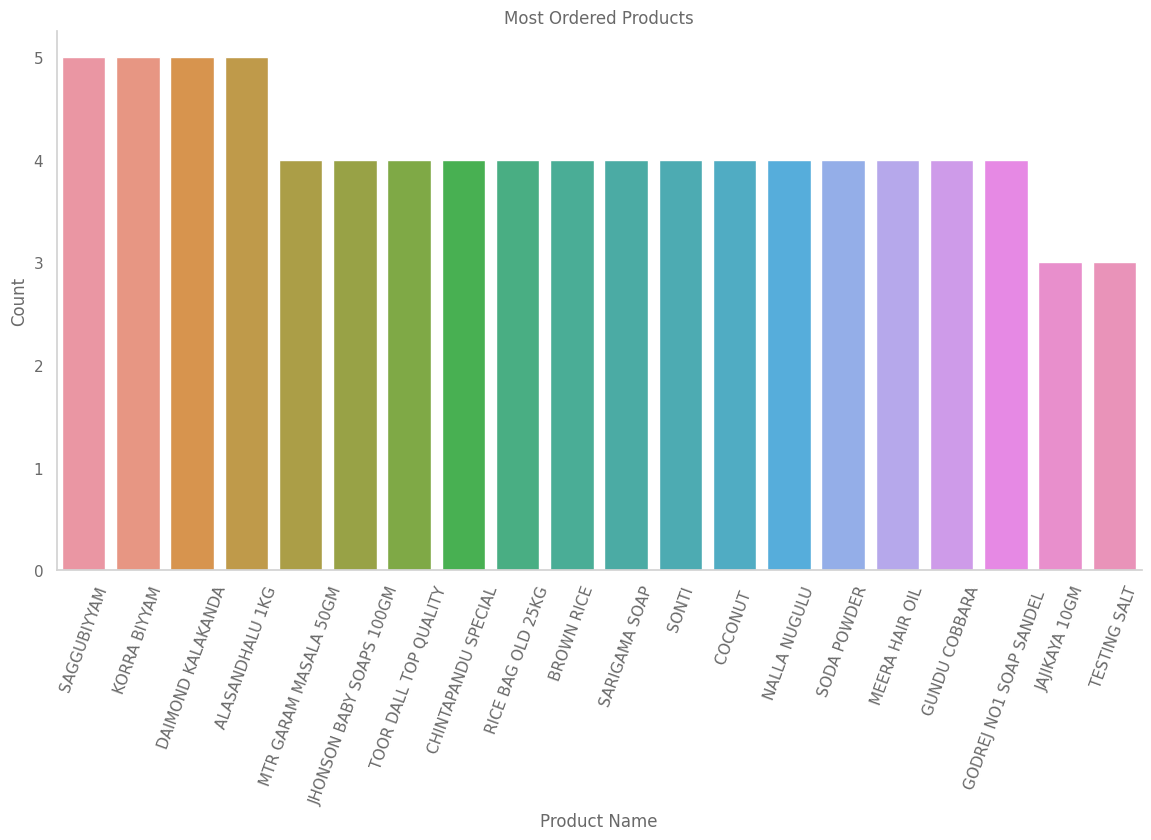

In [64]:
plt.figure(figsize = (14,7))
sns.countplot(x='product_name', data= order_products_desc,
              order = order_products_desc.product_name.value_counts().index[:20])
plt.title('Most Ordered Products')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Product Name')

Text(0.5, 0, 'Product Name')

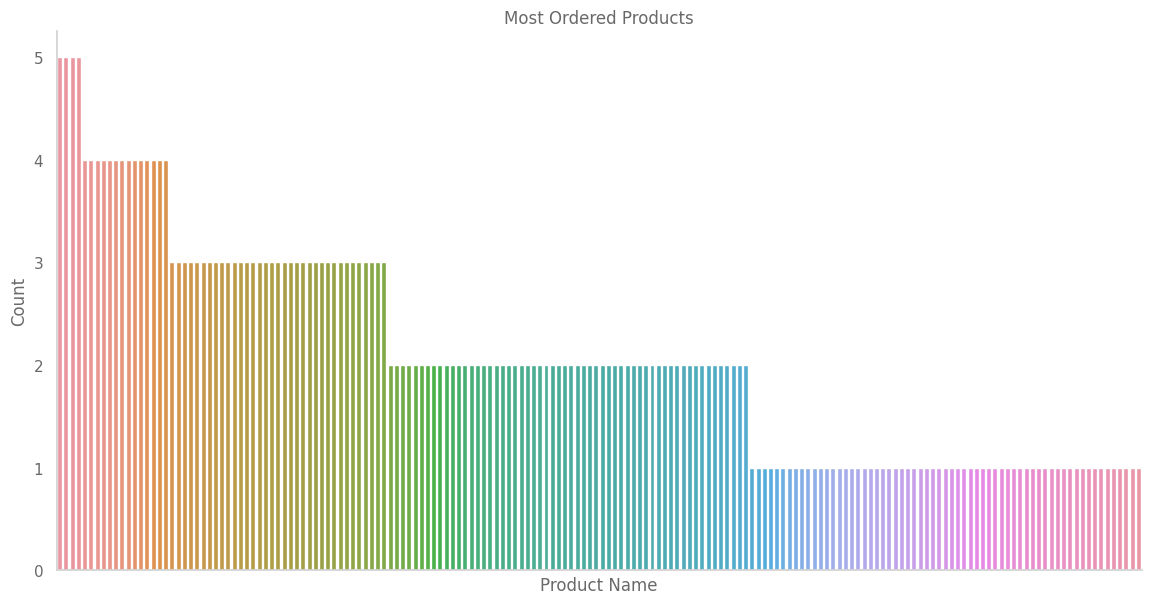

In [65]:
plt.figure(figsize = (14,7))
sns.countplot(x='product_name', data= order_products_desc,
              order = order_products_desc.product_name.value_counts().index[:200])
plt.title('Most Ordered Products')
plt.xticks([])
plt.ylabel('Count')
plt.xlabel('Product Name')

Text(0.5, 0, 'Aisle')

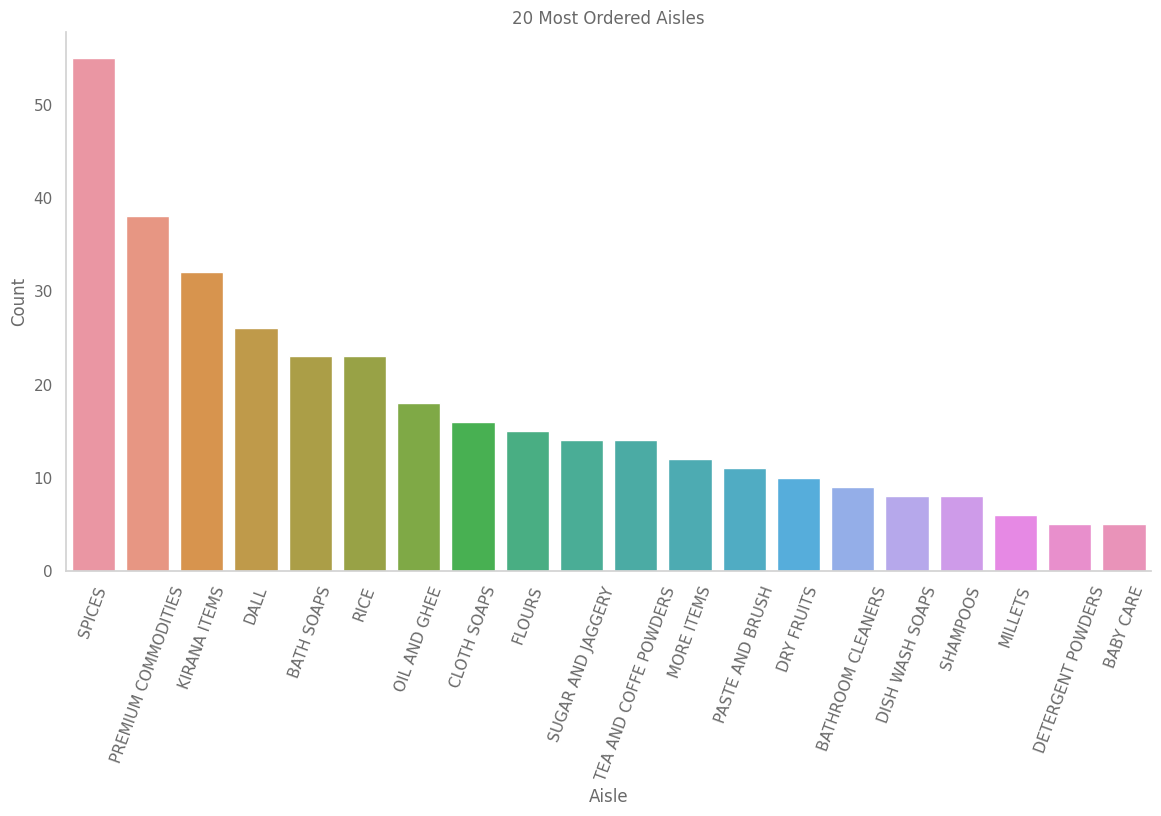

In [67]:
plt.figure(figsize = (14,7))
sns.countplot(x='aisle', data= order_products_desc, order = order_products_desc.aisle.value_counts().index[:20])
plt.title('20 Most Ordered Aisles')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.xlabel('Aisle')

Merge user orders

In [68]:
# Now merge the orders with the ordered prodcuts, combining on order_id
# This is a lot of info. We will trim some out before modeling.
merged_orders = pd.merge(orders, order_products_desc, on = 'order_id')
merged_orders.head() # Because the products showing are from the 1st order for this user, they all have Nan in days_since
# Because pd.merge defaults to an inner join, the test orders are not in this dataframe because they had no products.

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,5762999,1,prior,1,2,8,NaN,68,1,1,ARIKALU 1KG,6,1,MILLETS,Grains and Cereals Department
1,5770554,1,prior,2,3,7,15.0,181,2,1,VARSHA SOAP,18,7,CLOTH SOAPS,Household Items Department
2,5769687,1,prior,3,3,12,21.0,180,3,0,SUPER STAR SOAP,18,7,CLOTH SOAPS,Household Items Department
3,5753289,1,prior,4,4,7,29.0,111,4,1,DRIED DATES,9,4,DRY FRUITS,Snacks and Nuts Department
4,5749777,1,prior,5,4,15,28.0,157,5,0,PEPSODENT 100GM,15,7,PASTE AND BRUSH,Household Items Department


In [69]:
len(merged_orders)

328

In [70]:
merged_orders[merged_orders['user_id']==7]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
54,5184337,7,prior,1,3,9,NaN,202,1,0,NALLA NUGULU,23,11,MORE ITEMS,Miscellaneous Department
55,5149017,7,prior,2,1,19,30.0,16,2,0,BROWN RICE,2,1,RICE,Grains and Cereals Department
56,5146425,7,prior,3,0,18,30.0,88,3,0,MTR RASAM 100GM,7,3,SPICES,General Grocery Department
57,5134067,7,prior,4,2,10,9.0,27,4,0,DAIMOND KALAKANDA,3,2,SUGAR AND JAGGERY,Sweeteners Department
58,5123067,7,prior,5,5,18,3.0,42,5,0,SODA POWDER,4,3,KIRANA ITEMS,General Grocery Department
59,5121122,7,prior,6,1,18,10.0,39,6,0,MENTULU,4,3,KIRANA ITEMS,General Grocery Department
60,5103148,7,prior,7,1,15,7.0,51,7,0,GRAM DALL 1KG,5,10,PREMIUM COMMODITIES,Specialty and Premium Products Department
61,5101991,7,prior,8,2,12,8.0,176,8,1,ETA SOAP,18,7,CLOTH SOAPS,Household Items Department
62,5092029,7,prior,9,6,7,4.0,41,9,0,SONTI,4,3,KIRANA ITEMS,General Grocery Department
63,5081710,7,prior,10,1,20,9.0,29,10,1,SPECIAL JAGGERY 1KG PURE,3,2,SUGAR AND JAGGERY,Sweeteners Department


In [71]:
orders[orders['user_id']==7]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
54,5184337,7,prior,1,3,9,NaN
55,5149017,7,prior,2,1,19,30.0
56,5146425,7,prior,3,0,18,30.0
57,5134067,7,prior,4,2,10,9.0
58,5123067,7,prior,5,5,18,3.0
59,5121122,7,prior,6,1,18,10.0
60,5103148,7,prior,7,1,15,7.0
61,5101991,7,prior,8,2,12,8.0
62,5092029,7,prior,9,6,7,4.0
63,5081710,7,prior,10,1,20,9.0


In [72]:
test = orders[orders['eval_set']=='test']
test.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
44,5275460,4,test,6,3,12,30.0
49,5214957,5,test,5,0,11,6.0
53,5193648,6,test,4,3,16,22.0
78,4949596,8,test,4,1,14,10.0
82,4888865,9,test,4,6,10,30.0


In [74]:
# Now I can see everything a particular user has ordered, and how often
merged_orders[merged_orders['user_id']==7]['product_name'].value_counts()

NALLA NUGULU                1
COLGATE STRONG TEETH        1
KANDULU                     1
GODREJ NO1 SOAP SANDEL      1
MASOOR DALL RED             1
ONIONS                      1
CORIANDER SEEDS             1
RED CHILLIES                1
RAICHUR JONNALU             1
MILLMAKER                   1
DABUR RED PASTE             1
BROWN RICE                  1
SPECIAL JAGGERY 1KG PURE    1
SONTI                       1
ETA SOAP                    1
GRAM DALL 1KG               1
MENTULU                     1
SODA POWDER                 1
DAIMOND KALAKANDA           1
MTR RASAM 100GM             1
MAIDA PINDI 1KG             1
Name: product_name, dtype: int64

Prepare data for recommendation system

In [75]:
# Ok so I need user_id, product_id, and 'number of times it was purchased'
user_item = merged_orders[['user_id', 'product_id', 'reordered']] # Maybe I can use the reordered flag to increment

In [77]:
#That is a person ordering an item more than once.
user_item[user_item.duplicated(subset = ['user_id', 'product_id'], keep = 'first')]

,user_id,product_id,reordered
32,3,138,1
168,24,22,0
246,39,74,1
267,41,133,0
300,46,86,1


In [79]:
# Ah this is what I need.  The value counts of each product id for each user.

user_item[user_item['user_id']==7].product_id.value_counts()

202    1
151    1
8      1
168    1
5      1
45     1
73     1
82     1
12     1
38     1
153    1
16     1
29     1
41     1
176    1
51     1
39     1
42     1
27     1
88     1
123    1
Name: product_id, dtype: int64

In [82]:
# Started at 8:51pm, ended 11:13pm

# Creates list of data tuples of user, product, count

data=[]
data_columns=['user_id','product_id','count']
for user in user_item.user_id.unique():
     counts = user_item[user_item['user_id']==user].product_id.value_counts()
     for i in range(len(counts)):
         data.append([user, counts.index[i], counts.values[i]])

In [83]:
rec_df = pd.DataFrame(data, columns=data_columns)
rec_df

,user_id,product_id,count
0,1,68,1
1,1,181,1
2,1,180,1
3,1,111,1
4,1,157,1
...,...,...,...
318,50,100,1
319,50,121,1
320,50,205,1
321,50,164,1


In [84]:
len(rec_df)

323

In [85]:
rec_df[rec_df['user_id']==1]

,user_id,product_id,count
0,1,68,1
1,1,181,1
2,1,180,1
3,1,111,1
4,1,157,1
5,1,18,1
6,1,179,1
7,1,121,1
8,1,84,1
9,1,196,1


In [86]:
#  Hmm. No one bought anything more than 100 times.  Is that coincidental?

rec_df['count'].max()

2

In [87]:

rec_df['count'].value_counts()

1    318
2      5
Name: count, dtype: int64

In [88]:
products_with_count = rec_df.groupby('product_id').sum().drop(columns='user_id').sort_values(by='count')
products_with_count[products_with_count['count']<=5]  # 2741 products ordered 5 times or less

,count
product_id,
103,1
126,1
120,1
117,1
111,1
...,...
89,4
42,4
50,5


Modeling a recommendation system

In [90]:
!pip install scikit-surprise  # Install the 'surprise' library

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import KNNBaseline
from surprise import KNNBasic
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise.prediction_algorithms import SVD, SVDpp
from surprise.model_selection import GridSearchCV
from surprise import accuracy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3163339 sha256=52cd2834ce4233bcca8048d599ded2d812863b059ae72fcd110ee8a8951f2902
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [91]:
# A reader is still needed but only the rating_scale param is required.
reader = Reader(rating_scale=(1, 100))

# The columns must correspond to user id, item id and ratings (in that order).
rec_data = Dataset.load_from_df(rec_df, reader)

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(rec_data, test_size=.25, random_state=12)

In [93]:
# Start with a memory-based model
# These just take up too much memory for the size of my data.  Moving on to model-based.
sim_cos = {'name':'cosine', 'user_based':False}
tic = time.time()
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)
fit_time = time.time()-tic
print('fit ', fit_time)

Computing the cosine similarity matrix...
Done computing similarity matrix.
fit  0.0017778873443603516


In [94]:
tic = time.time()
svd_algo = SVD()
svd_algo.fit(trainset)
fit_time = time.time()-tic
print('fit ', fit_time)
toc = time.time()
svd_algo_predictions = svd_algo.test(testset)
pred_time = time.time()-toc
print('pred ', pred_time)
# Then compute RMSE
accuracy.rmse(svd_algo_predictions)

fit  0.0054934024810791016
pred  0.003086090087890625
RMSE: 0.1720


0.17203320889872142

In [95]:
accuracy.rmse(svd_algo_predictions)

RMSE: 0.1720


0.17203320889872142

In [100]:
rec_df[rec_df['user_id'] == 12]

,user_id,product_id,count
92,12,195,1
93,12,28,1
94,12,161,1
95,12,134,1
96,12,173,1
97,12,24,1
98,12,16,1
99,12,204,1
100,12,156,1


In [101]:
uid=12
iid=16
# actual value was 2, prediction is 1.77
pred = svd_algo.predict(uid, iid, r_ui=2, verbose=True)

user: 12         item: 16         r_ui = 2.00   est = 1.00   {'was_impossible': False}


In [102]:
testset[0]

(34, 166, 1.0)

In [103]:
pred = svd_algo.predict(34, 166, r_ui=1, verbose=True)

user: 34         item: 166        r_ui = 1.00   est = 1.01   {'was_impossible': False}


In [104]:
svd_algo_predictions[0]

Prediction(uid=34, iid=166, r_ui=1.0, est=1.012396694214876, details={'was_impossible': False})